# AutoClean y Predicción del tiempo de Intervención

- Grupo de Proyecto: Whitthe

## Index

1.[Carga de datos y Exploración](#id1)

2.[AutoClean](#id2)

3.[Importancia de carácteristicas (RandomForest)](#id3)

4.[Primero modelos](#id4)

5.[Mejora del modelo (Oversamplig)](#id6)





[Anexo](#id5)

## 1. Carga datos y Exploración<a name="id1"></a>

Proceso fundamental para comprender y trabajar con los datos que se explorarán y analizarán, sentando las bases para análisis posteriores y la construcción de modelos.

In [2]:
import pandas as pd

data = pd.read_csv('nuevo_df.csv')

# Convertir todas las variables a tipo str
data = data.astype(str)

data = data.drop('Otro..especifique..1', axis=1)

data.head()

,Medicación.Actual,Alcohol,Otras.Drogas,Tuberculosis,Nitratos.orgánicos,Hormonas.pancreáticas,Antitusígenos,Fármacos.otológicos,Tipo.de.Intervención.Quirúrgica,Tipo.de.cirugía,...,Implante.5...Posición.2,Implante.5...Defecto.tipo.I..infraóseo..2,Implante.5...Defecto.tipo.II..supraóseo..2,Implante.6...Posición.1,Implante.6...Defecto.tipo.I..infraóseo..1,Implante.6...Defecto.tipo.II..supraóseo..1,Implante.7...Posición,Implante.7...Defecto.tipo.I..infraóseo.,Implante.7...Defecto.tipo.II..supraóseo.,duracion_intervencion
0,No,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,10-20 minutos
1,No,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,20-40 minutos
2,No,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,60-90 minutos
3,Sí,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,10-20 minutos
4,No,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,20-40 minutos


In [3]:
data['duracion_intervencion'].value_counts()

duracion_intervencion
20-40 minutos      955
10-20 minutos      761
40-60 minutos      361
5-10 minutos       354
0                  174
60-90 minutos      160
0-5 minutos        127
90-120 minutos      58
120-180 minutos     22
>180 minutos         8
Response             1
Name: count, dtype: int64

### Distribución

Comenzaremos con la dsitribución de nuesta variable predictora, a ver con que nos encontramos

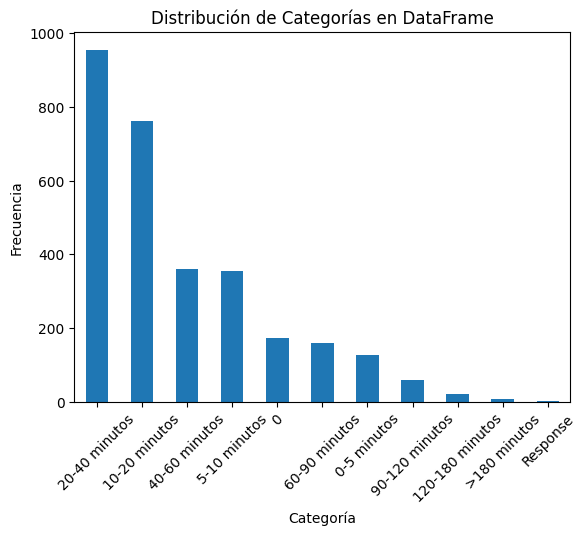

In [4]:
frecuencias = data['duracion_intervencion'].value_counts()

import matplotlib.pyplot as plt

# Creando el gráfico de barras
frecuencias.plot(kind='bar')

# Etiquetas y título
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Distribución de Categorías en DataFrame')
plt.xticks(rotation=45)  # Rota las etiquetas de las categorías para mejor visualización
plt.show()


#### Interpretación

En los datos de nuestra variable predictora, tenemos **2 valores** que no correponden a la naturalidad de los datos, esto son '0' y 'Responde'.

Vamos a proceder con la eliminación de las filas que contengan estos valores para no afectar negativamente al análisis y logicamente por el nulo sentido de analizar algo que es incorrecto.

Vamos a eliminar tambien la variabe de **"0-5 minutos"**, ya que es poco representativa y común, ya que tenemos otras que capturan mejor el tiempo que dura la intervención quirurgica.

In [5]:
import pandas as pd

print("Valores únicos antes de la limpieza:\n", data['duracion_intervencion'].unique(),'\n')

data = data[~data['duracion_intervencion'].isin(['0', 'Response'])]
data = data.loc[data['duracion_intervencion'] != '0-5 minutos']
data = data.loc[data['duracion_intervencion'] != '>180 minutos']

print("Valores únicos después de la limpieza:\n", data['duracion_intervencion'].unique())

# Resetear el índice del DataFrame limpio
data.reset_index(drop=True, inplace=True)

Valores únicos antes de la limpieza:
 ['10-20 minutos' '20-40 minutos' '60-90 minutos' '40-60 minutos'
 '5-10 minutos' '0-5 minutos' '0' '120-180 minutos' '90-120 minutos'
 '>180 minutos' 'Response'] 

Valores únicos después de la limpieza:
 ['10-20 minutos' '20-40 minutos' '60-90 minutos' '40-60 minutos'
 '5-10 minutos' '120-180 minutos' '90-120 minutos']


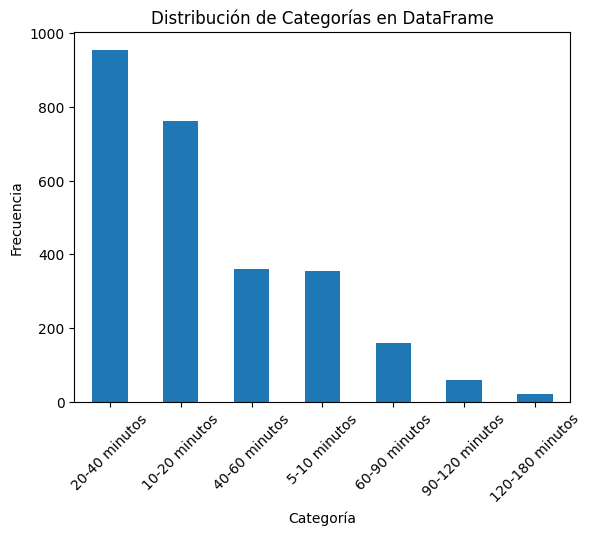

In [6]:
frecuencias = data['duracion_intervencion'].value_counts()

import matplotlib.pyplot as plt

# Creando el gráfico de barras
frecuencias.plot(kind='bar')

# Etiquetas y título
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Distribución de Categorías en DataFrame')
plt.xticks(rotation=45)  # Rota las etiquetas de las categorías para mejor visualización
plt.show()


Una vez tenemos la variable predictora preparada y analizada, vamos a relaizar la partición de los datos en Train, Test y sus escalados.

Vamos con la limpieza de los datos.

In [7]:
data['duracion_intervencion'].value_counts()

duracion_intervencion
20-40 minutos      955
10-20 minutos      761
40-60 minutos      361
5-10 minutos       354
60-90 minutos      160
90-120 minutos      58
120-180 minutos     22
Name: count, dtype: int64

___

## 2. Autoclean<a name="id2"></a>

La librería datacleaner es una herramienta de Python que automáticamente limpia y preprocesa el conjunto de datos para el análisis de datos y el modelado de machine learning.

El módulo autoclean de datacleaner es probablemente el más conocido y utilizado.

En nuestro caso, el cambio realizado mas notable es:

- **Estandarización de Columnas Numéricas**: Puede escalar las características numéricas para que tengan un rango común o una distribución estándar, lo que es comúnmente necesario para modelos de machine learning que son sensibles a la escala de los datos.

Pero antes de nada, un paso vital.

### Busqueda de Na's

Paso esencial en la limpieza y preparación de datos. Los Na's pueden afectar negativamente el análisis y el modelado de datos, por lo que identificarlos y manejarlos de manera adecuada es fundamental.

En esta etapa, se busca cualquier valor Na en el conjunto de datos y se decide cómo abordarlos, en nuestro caso será con la librería Autoclean.

In [8]:
data.isnull().sum()

Medicación.Actual                             0
Alcohol                                       0
Otras.Drogas                                  0
Tuberculosis                                  0
Nitratos.orgánicos                            0
                                             ..
Implante.6...Defecto.tipo.II..supraóseo..1    0
Implante.7...Posición                         0
Implante.7...Defecto.tipo.I..infraóseo.       0
Implante.7...Defecto.tipo.II..supraóseo.      0
duracion_intervencion                         0
Length: 100, dtype: int64

Como se puede observar, **NO** tenemos Na's e nuestro conjunto de datos.

### Limpieza

Vamos con la librería, observemos los cambios que produce

In [9]:
!pip install datacleaner
from datacleaner import autoclean

data= autoclean(data)

# Los exportamos para usarlos mas abajo
data.to_csv("data_clean.csv", index=False)

data.head()

  Preparing metadata (setup.py) ... done
  Created wheel for datacleaner: filename=datacleaner-0.1.5-py3-none-any.whl size=7408 sha256=dc2a64419723d8a943389302e774e0ca1b2196ff7abce1b04fe7b5eeb747d9c1
  Stored in directory: /root/.cache/pip/wheels/8f/bc/5b/f7ca5772f61851334a8580f3ede175b92a7122eef3464e2b3d
Successfully built datacleaner


,Medicación.Actual,Alcohol,Otras.Drogas,Tuberculosis,Nitratos.orgánicos,Hormonas.pancreáticas,Antitusígenos,Fármacos.otológicos,Tipo.de.Intervención.Quirúrgica,Tipo.de.cirugía,...,Implante.5...Posición.2,Implante.5...Defecto.tipo.I..infraóseo..2,Implante.5...Defecto.tipo.II..supraóseo..2,Implante.6...Posición.1,Implante.6...Defecto.tipo.I..infraóseo..1,Implante.6...Defecto.tipo.II..supraóseo..1,Implante.7...Posición,Implante.7...Defecto.tipo.I..infraóseo.,Implante.7...Defecto.tipo.II..supraóseo.,duracion_intervencion
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


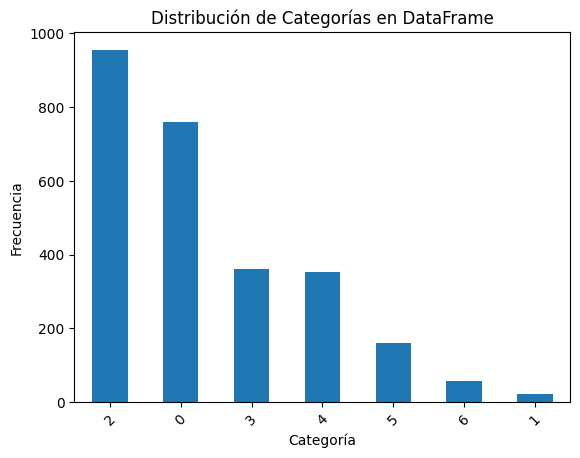

In [10]:
frecuencias = data['duracion_intervencion'].value_counts()

import matplotlib.pyplot as plt

# Creando el gráfico de barras
frecuencias.plot(kind='bar')

# Etiquetas y título
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Distribución de Categorías en DataFrame')
plt.xticks(rotation=45)  # Rota las etiquetas de las categorías para mejor visualización
plt.show()


Como bien podemos observar, nuestras columnas, que son de naturaleza categórica, han sido reemplazadas por numeros, que nos indican las distintas categorias que tienen nuestreas variables, esto facilitará la labor de análisis muchisimo.

El siguiente paso es de gran importancia.

In [11]:
data['duracion_intervencion'].value_counts()

duracion_intervencion
2    955
0    761
3    361
4    354
5    160
6     58
1     22
Name: count, dtype: int64

___

## 3. Importancia de carácteristicas (RandomForest)<a name="id3"></a>

La importancia de las características (o importancia de los atributos) en el contexto de un modelo de Random Forest es una medida de la contribución de cada característica en la predicción de la variable objetivo.

Trata de **cuantificar cuánto ayuda** cada característica para mejorar la precisión del modelo.

En un modelo de Random Forest, que es un ensamble de árboles de decisión, cada árbol se construye como resultado de un proceso estocástico que implica seleccionar subconjuntos de características y subconjuntos de datos. Después de entrenar, cada árbol de decisión dentro del bosque tiene una idea de cuáles características ayudaron más a hacer predicciones precisas.

Existe un paso necesario antes de ajustar el modelo para visualizar la importancia de las características.

### Partición de los datos

Vamos a dividir nuestro cojunto de datos en Train, Test y sus escalados.

In [12]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = data.drop('duracion_intervencion', axis=1)  # Aquí 'target_variable_column_name' es el nombre de la columna que contiene la variable objetivo
y = data['duracion_intervencion']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Ya estamos preparados para seguir con la visualización de las características más importantes.

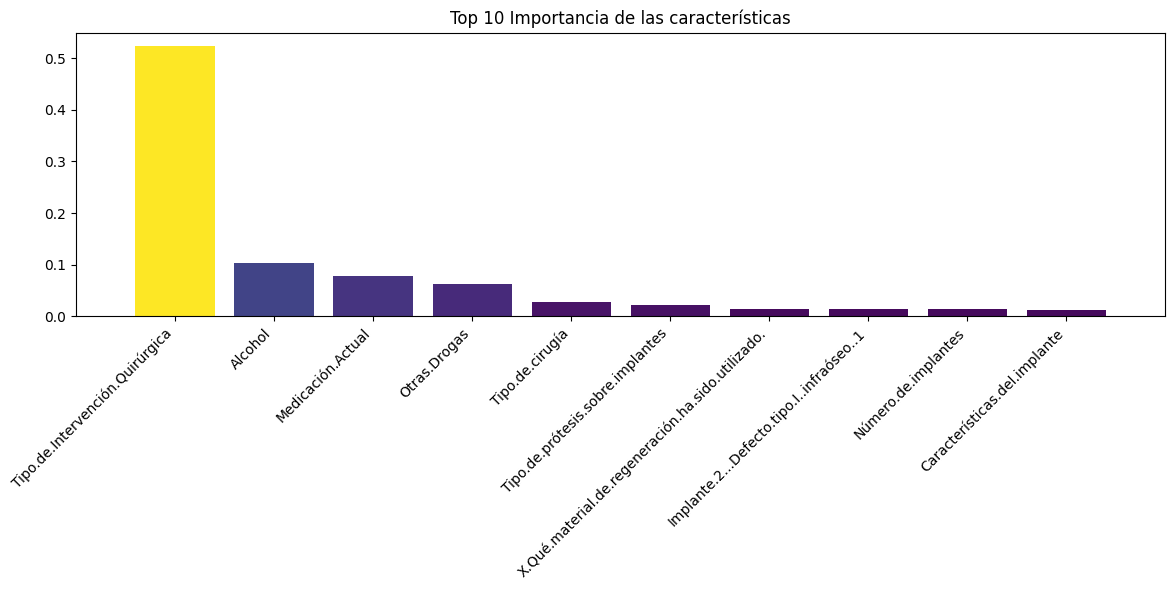

In [13]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Modelo RandomForest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)

# Obtener las importancias de las características y sus índices
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Seleccionar las 10 características más importantes
top_k = 10
sorted_importances = importances[indices[:top_k]]
sorted_indices = indices[:top_k]

# Nombres de las 10 características más importantes
feature_names = data.columns.tolist()

feature_names = np.array(feature_names)
top_k_feature_names = feature_names[sorted_indices]

colors = plt.cm.viridis(sorted_importances / sorted_importances.max())

# Dibujar la importancia de las 10 características más importantes
plt.figure(figsize=(12, 6))
plt.title("Top 10 Importancia de las características")
plt.bar(range(top_k), sorted_importances, color=colors, align="center")
plt.xticks(range(top_k), top_k_feature_names, rotation=45, ha='right')
plt.xlim([-1, top_k])
plt.tight_layout()
plt.show()

# Reducir el DataFrame completo a las 10 características más importantes
data_reduced = data[top_k_feature_names.tolist() + ['duracion_intervencion']]  # Incluye la columna objetivo nuevamente si es necesario

In [14]:
data = data_reduced

from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = data.drop('duracion_intervencion', axis=1)  # Aquí 'target_variable_column_name' es el nombre de la columna que contiene la variable objetivo
y = data['duracion_intervencion']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
data.head()

,Tipo.de.Intervención.Quirúrgica,Alcohol,Medicación.Actual,Otras.Drogas,Tipo.de.cirugía,Tipo.de.prótesis.sobre.implantes,X.Qué.material.de.regeneración.ha.sido.utilizado.,Implante.2...Defecto.tipo.I..infraóseo..1,Número.de.implantes,Características.del.implante,duracion_intervencion
0,0,2,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,2
2,0,2,0,0,0,0,0,0,0,0,5
3,0,2,1,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0,0,2


### Cambio nombre de variables

En este punto, cambio el nombre de las varaibles para poder usar nobres mas fáciles en la APP de streamlit

In [16]:
data.columns = ['Tipo Intervencion', 'Alcohol', "Medicacion actual",
                "Otras drogas","Protesis sobre implante","Tipo de cirugia",
                "Implante 1 defecto tipo 1 infraóseo","Material de regeneracion",
               "Numero de implantes", "Caracteristicas del implante", "duracion_intervencion"]


### Binarización y cambio de formato (duracion_intervencion)

Para tratar los datos como un problema de regresión, vamos a categorizar los datos, transformandolos a numerico e inputando los valores de la variable predictora por la media de sus rangos de tiempo.

**Binarización**

Vamos a Binarizar todas las variabes excepto la variable predictora (duracion_intervencion).

In [17]:
data.head()
df=data

df.head()

,Tipo Intervencion,Alcohol,Medicacion actual,Otras drogas,Protesis sobre implante,Tipo de cirugia,Implante 1 defecto tipo 1 infraóseo,Material de regeneracion,Numero de implantes,Caracteristicas del implante,duracion_intervencion
0,0,2,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,2
2,0,2,0,0,0,0,0,0,0,0,5
3,0,2,1,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0,0,2


Como podemos osbervar, tenemos para una misma variable, varios valores para la misma.

Es por ello, que vamos a crear 1 columna nueva por cada categoria en la variable con valores binarios para cada una.

In [18]:
import pandas as pd

categorical_cols = [col for col in df.columns if col != 'duracion_intervencion']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df_encoded.head())

   duracion_intervencion  Tipo Intervencion_1  Tipo Intervencion_2  Alcohol_1  \
0                      0                False                False      False   
1                      2                False                False      False   
2                      5                False                False      False   
3                      0                False                False      False   
4                      2                False                False      False   

   Alcohol_2  Medicacion actual_1  Otras drogas_1  Protesis sobre implante_1  \
0       True                False           False                      False   
1       True                False           False                      False   
2       True                False           False                      False   
3       True                 True           False                      False   
4       True                False           False                      False   

   Protesis sobre implante_2  Pr

In [19]:
print(df_encoded['duracion_intervencion'].dtype)


int64


In [20]:
data = df_encoded.astype(int)
df_encoded.head()

,duracion_intervencion,Tipo Intervencion_1,Tipo Intervencion_2,Alcohol_1,Alcohol_2,Medicacion actual_1,Otras drogas_1,Protesis sobre implante_1,Protesis sobre implante_2,Protesis sobre implante_3,...,Numero de implantes_2,Numero de implantes_3,Numero de implantes_4,Numero de implantes_5,Numero de implantes_6,Caracteristicas del implante_1,Caracteristicas del implante_2,Caracteristicas del implante_3,Caracteristicas del implante_4,Caracteristicas del implante_5
0,0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,5,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
df_encoded['duracion_intervencion'].value_counts()

duracion_intervencion
2    955
0    761
3    361
4    354
5    160
6     58
1     22
Name: count, dtype: int64

Pues bien, el paso de la binarización ya lo tenemos preparado, ahora vamos con los valores de la duracion de la intervencion, la cual vamos a reemplazarla por el valor medio del rango, por ejemplo:

Rango(5-10) --> El **valor a remplazar** será *7.5*

**Cambio de los valores en duracion_intervencion**

In [22]:
mapeo = {3:50, 1:150, 4:7.5, 5:75, 6:105, 0:15, 2:30}

df_encoded['duracion_intervencion'] = df_encoded['duracion_intervencion'].replace(mapeo)

In [23]:
df_encoded['duracion_intervencion'].value_counts()

duracion_intervencion
30.0     955
15.0     761
50.0     361
7.5      354
75.0     160
105.0     58
150.0     22
Name: count, dtype: int64

**Breve análisis estadístico**

In [24]:
import pandas as pd
from scipy import stats

# Estadísticas descriptivas
print(f"Media: {df_encoded['duracion_intervencion'].mean()}")
print(f"Moda: {df_encoded['duracion_intervencion'].mode()[0]}")
print(f"Desviación Estándar: {df_encoded['duracion_intervencion'].std()}")
print(f"Varianza: {df_encoded['duracion_intervencion'].var()}")
print(f"Mediana: {df_encoded['duracion_intervencion'].median()}")
print(f"Mínimo: {df_encoded['duracion_intervencion'].min()}")
print(f"Máximo: {df_encoded['duracion_intervencion'].max()}")
Q3 = df_encoded['duracion_intervencion'].quantile(0.75)
Q1 = df_encoded['duracion_intervencion'].quantile(0.25)
IQR = Q3 - Q1
print(f"IQR (Rango Inter-Cuartilico): {IQR}")


Media: 30.760014975664546
Moda: 30.0
Desviación Estándar: 23.386867450309637
Varianza: 546.9455691383524
Mediana: 30.0
Mínimo: 7.5
Máximo: 150.0
IQR (Rango Inter-Cuartilico): 15.0


**Alarma 2!!!**

La variable **"Otro..especifique..1"**, tiene una distribución que puede molestar en el análisis, haciendo que las prediciones no sean correctas y se clasifiquen mas las duraciones de las cirugías.

El problema fué a la hora de establecer la forma de rellenar la columna, ya que no se siguió ningún parámetro de idoneidad para todos los que fuerán a rellenarla. Es por ello que tenemos muchas variables con el mismo nombre, pero de muchisimas formas distintas y arreglarlo es tedioso.

Es por ellos que decidimos eliminarla al principio y sacrificar esta información para la mejora del modelo.

### Cambio nombre de variables

En este punto, cambio el nombre de las varaibles para poder usar nobres mas fáciles en la APP de streamlit

In [25]:
df_encoded.head()

,duracion_intervencion,Tipo Intervencion_1,Tipo Intervencion_2,Alcohol_1,Alcohol_2,Medicacion actual_1,Otras drogas_1,Protesis sobre implante_1,Protesis sobre implante_2,Protesis sobre implante_3,...,Numero de implantes_2,Numero de implantes_3,Numero de implantes_4,Numero de implantes_5,Numero de implantes_6,Caracteristicas del implante_1,Caracteristicas del implante_2,Caracteristicas del implante_3,Caracteristicas del implante_4,Caracteristicas del implante_5
0,15.0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,30.0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,75.0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,15.0,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,30.0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


___

## 4. Primero modelos<a name="id4"></a>

En este punto, vamos a comenzar con algunos modelos de classificación, para poder predecir que intervalo de duración nos va a llevar realizar la intervención quirurgica.

El procedimiento que vamos a realizar es el de automatizar el proceso de probar varios modelos a la vez y comparar su rendimiento. Esta técnica a menudo se conoce como **evaluación de modelo o selección de modelo**.

En Python, podemos hacer esto utilizando la librería scikit-learn y su módulo model_selection. Una manera de hacer esto es utilizando Pipeline para el preprocesamiento y la evaluación de diferentes modelos, junto con **GridSearchCV** o **RandomizedSearchCV** para la optimización de hiperparámetros.

### Separación de los datos

In [26]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('duracion_intervencion', axis=1)
y = df_encoded['duracion_intervencion']

# Dividimos los datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB  # No tiene contraparte directa de regresión en sklearn
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

modelos = {
    'LinearRegression': LinearRegression(),
    'SGDRegressor': SGDRegressor(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'MLPRegressor': MLPRegressor(),
    'XGBRegressor': XGBRegressor(objective='reg:squarederror')
}


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

resultados = []
nombres = []
for nombre, modelo in modelos.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('modelo', modelo)
    ])
    # Usamos neg_mean_squared_error para compatibilidad con cross_val_score
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    # Convertimos MSE negativos a RMSE positivos para mejor interpretación
    rmse_scores = np.sqrt(-cv_scores)
    resultados.append(rmse_scores)
    nombres.append(nombre)
    print(f'{nombre}: {rmse_scores.mean():.4f} (+/- {rmse_scores.std():.4f})')


LinearRegression: 238407236095333.4062 (+/- 100541218963689.4844)
SGDRegressor: 106316.6132 (+/- 54653.5708)
SVR: 21.3235 (+/- 1.1156)
KNeighborsRegressor: 20.8389 (+/- 0.9217)
DecisionTreeRegressor: 20.3494 (+/- 1.2805)
RandomForestRegressor: 20.1688 (+/- 1.2376)
GradientBoostingRegressor: 20.2484 (+/- 1.3074)
AdaBoostRegressor: 21.0783 (+/- 2.2117)
MLPRegressor: 20.1496 (+/- 0.9819)
XGBRegressor: 20.2242 (+/- 1.3942)


In [29]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Definición del ensamble de modelos
estimators = [
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
    ('svr', SVR())
]
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge()
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('stacking', stacking_regressor)
])

# Entrenamiento y predicciones
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

# Cálculo de métricas
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
explained_variance = explained_variance_score(y_test, predictions)

# Impresión de resultados
print(f"Ensamble RMSE: {rmse:.2f}")
print(f"Ensamble MAE: {mae:.2f}")


Ensamble RMSE: 20.75
Ensamble MAE: 14.44


Ensamble RMSE: 20.75
Ensamble MAE: 14.44
Adjusted R^2: 0.21
Explained Variance: 0.26
Comparación de Valores Reales y Predicciones:
[[105.         100.37016496]
 [ 15.          29.13093232]
 [ 50.          27.5885558 ]
 [ 30.          27.5885558 ]
 [  7.5         27.5885558 ]
 [  7.5         27.95434515]
 [ 30.          27.5885558 ]
 [ 50.          28.23255939]
 [ 15.          27.95434515]
 [  7.5         28.23255939]]


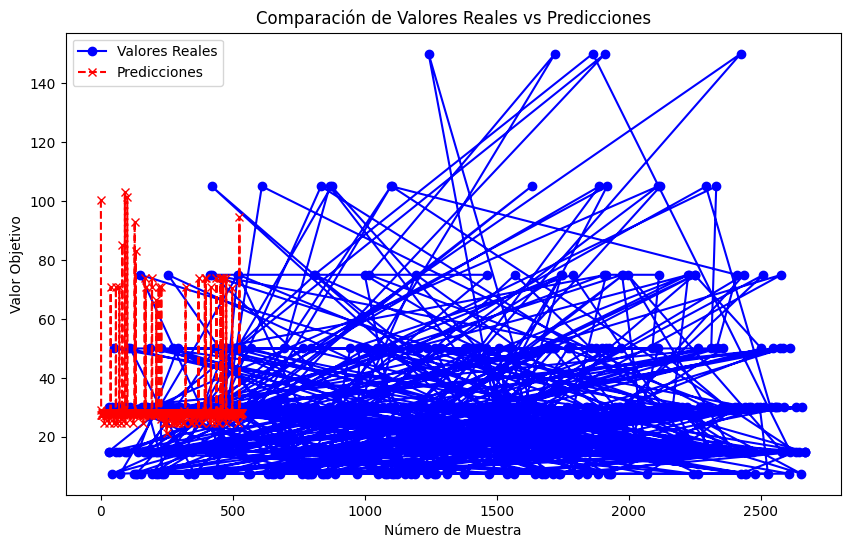

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import matplotlib.pyplot as plt

# Definición del ensamble de modelos
estimators = [
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
    ('svr', SVR())
]
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge()
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('stacking', stacking_regressor)
])

# Entrenamiento y predicciones
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

# Cálculo de métricas
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
explained_variance = explained_variance_score(y_test, predictions)

# Impresión de resultados
print(f"Ensamble RMSE: {rmse:.2f}")
print(f"Ensamble MAE: {mae:.2f}")
print(f"Adjusted R^2: {adj_r2:.2f}")
print(f"Explained Variance: {explained_variance:.2f}")

# Comparando predicciones y valores reales
comparison = np.vstack((y_test, predictions)).T
print("Comparación de Valores Reales y Predicciones:")
print(comparison[:10])  # Imprime las primeras 10 comparaciones para ver

# Gráfico para visualizar la comparación
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Valores Reales', color='blue', marker='o')
plt.plot(predictions, label='Predicciones', color='red', linestyle='dashed', marker='x')
plt.title('Comparación de Valores Reales vs Predicciones')
plt.xlabel('Número de Muestra')
plt.ylabel('Valor Objetivo')
plt.legend()
plt.show()


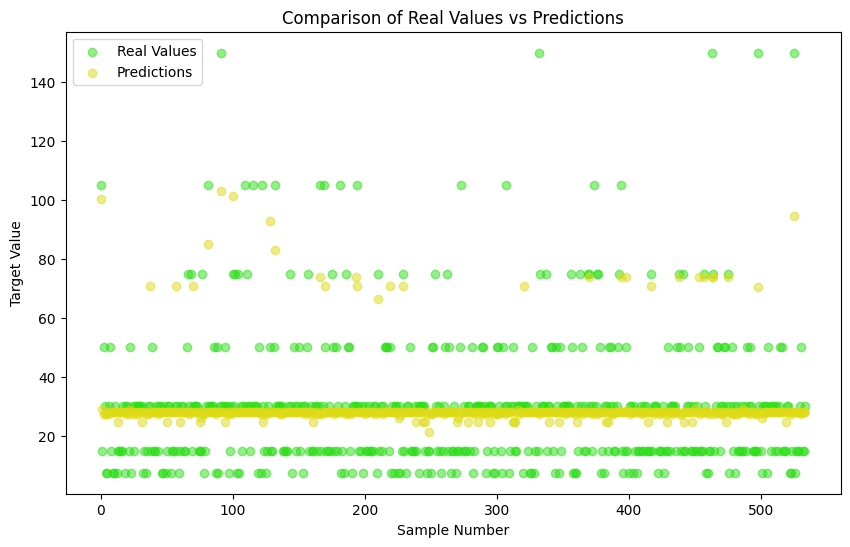

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Real Values', color='#2ADE16', alpha=0.5)
plt.scatter(range(len(predictions)), predictions, label='Predictions', color='#DEDB16', alpha=0.5)
plt.title('Comparison of Real Values vs Predictions')
plt.xlabel('Sample Number')
plt.ylabel('Target Value')
plt.legend()
plt.show()


# 5. Técnicas para curar el desbalanceo

El objetivo es acercar lo máximo posible a la variable, lo haremos con el **P-valor**.

Como deseamos saber si estamos cercanos a una distribución normal, calculamos el p-value.

Recordemos que el valor debe de ser **mayor a 0.05 para considerar una distribución normal**.

De no ser así, tendremos claramente un problema de desbalanceo en nuestra variable predictora.



In [34]:
data = df_encoded

,duracion_intervencion,Tipo Intervencion_1,Tipo Intervencion_2,Alcohol_1,Alcohol_2,Medicacion actual_1,Otras drogas_1,Protesis sobre implante_1,Protesis sobre implante_2,Protesis sobre implante_3,...,Numero de implantes_2,Numero de implantes_3,Numero de implantes_4,Numero de implantes_5,Numero de implantes_6,Caracteristicas del implante_1,Caracteristicas del implante_2,Caracteristicas del implante_3,Caracteristicas del implante_4,Caracteristicas del implante_5
0,15.0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,30.0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,75.0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,15.0,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,30.0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Vamos con el calculo de los valores comentados para estudiar su distribución.

In [37]:
import numpy as np
from scipy import stats

# Calcular la media y la desviación estándar
media = np.mean(data['duracion_intervencion'])
desviacion_estandar = np.std(data['duracion_intervencion'])

# Realizar el test de Shapiro-Wilk para normalidad
shapiro_test = stats.shapiro(data['duracion_intervencion'])
p_valor = shapiro_test.pvalue

# Mostrar resultados (las llamadas a función están comentadas para seguir las instrucciones)
print("Media:", media)
print("Desviación Estándar:", desviacion_estandar)
print("P-valor del test de Shapiro-Wilk:", p_valor)


Media: 30.760014975664546
Desviación Estándar: 23.38248911694724
P-valor del test de Shapiro-Wilk: 0.0


Un p-valor extremadamente pequeño, como **0.0**, sugiere que la distribución de los datos es significativamente **diferente de una distribución normal.**

Esto podría deberse a varias razones, como sesgo, datos anómalos, o una distribución multimodal.

Vamos a crear un histograma, a ver que nos aparece.

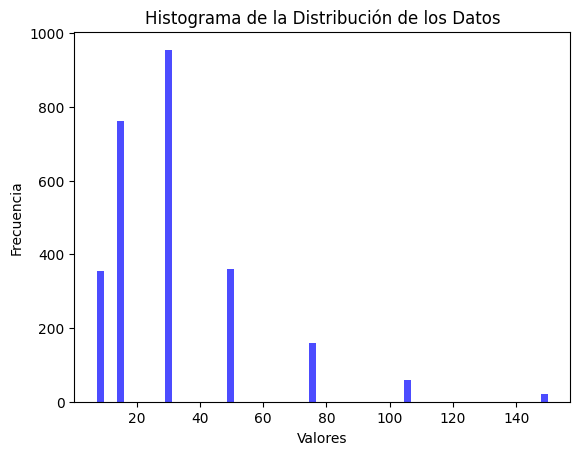

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Crear el histograma
plt.hist(data['duracion_intervencion'], bins='auto', color='blue', alpha=0.7)
plt.title('Histograma de la Distribución de los Datos')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()


El desbalanceo queda ya más que claro, es bastante grave.

Las soluciones propuestas son las de transformar los datos para poder acercarlos lo máximo a una distribución normal.

Como podemos observar, están segados a la derecha, por ello, vamos a realizar una **transformación logaritmica**.

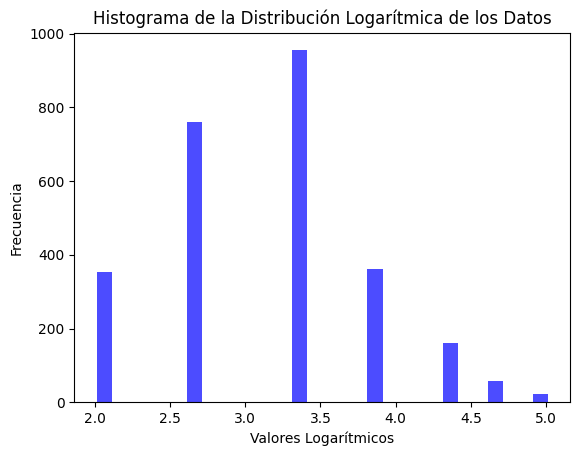

In [42]:
import numpy as np
import matplotlib.pyplot as plt

datos = np.array(data['duracion_intervencion'])  # Reemplazar con tus datos reales

# Aplicar la transformación logarítmica (asegurándose de que no hay ceros en los datos)
datos_log = np.log(datos[datos > 0])

# Crear el histograma de los datos transformados
plt.hist(datos_log, bins='auto', color='blue', alpha=0.7)
plt.title('Histograma de la Distribución Logarítmica de los Datos')
plt.xlabel('Valores Logarítmicos')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()


In [45]:
# Calcular la media y la desviación estándar
media = np.mean(datos_log)
desviacion_estandar = np.std(datos_log)

# Realizar el test de Shapiro-Wilk para normalidad
shapiro_test = stats.shapiro(datos_log)
p_valor = shapiro_test.pvalue

# Mostrar resultados (las llamadas a función están comentadas para seguir las instrucciones)
print("Media:", media)
print("Desviación Estándar:", desviacion_estandar)
print("P-valor del test de Shapiro-Wilk:", p_valor)


Media: 3.184368196069909
Desviación Estándar: 0.6968175066075696
P-valor del test de Shapiro-Wilk: 3.611923067275226e-35


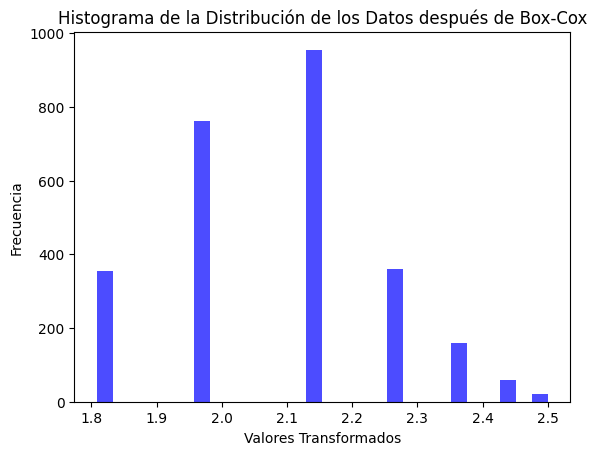

In [44]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Asegúrate de reemplazar 'datos' con tu conjunto de datos.
datos = np.array(data['duracion_intervencion'])  # Tus datos van aquí

# Asegurarte de que todos los datos son positivos
datos_positivos = datos + np.abs(min(datos)) + 1e-5  # Se suma una pequeña constante para evitar el logaritmo de cero

# Aplicar la transformación de Box-Cox
datos_transformados, lambda_optima = stats.boxcox(datos_positivos)

# Mostrar los datos transformados con Box-Cox en un histograma
plt.hist(datos_transformados, bins='auto', color='blue', alpha=0.7)
plt.title('Histograma de la Distribución de los Datos después de Box-Cox')
plt.xlabel('Valores Transformados')
plt.ylabel('Frecuencia')
plt.show()


In [46]:
# Calcular la media y la desviación estándar
media = np.mean(datos_transformados)
desviacion_estandar = np.std(datos_transformados)

# Realizar el test de Shapiro-Wilk para normalidad
shapiro_test = stats.shapiro(datos_transformados)
p_valor = shapiro_test.pvalue

# Mostrar resultados (las llamadas a función están comentadas para seguir las instrucciones)
print("Media:", media)
print("Desviación Estándar:", desviacion_estandar)
print("P-valor del test de Shapiro-Wilk:", p_valor)


Media: 2.086863116248281
Desviación Estándar: 0.16752176054879725
P-valor del test de Shapiro-Wilk: 1.4917142411093908e-35


La distribución normal no estamos ni rozandola, pero bueno, probemos el modelo de nuevo, quizás mejore...


In [51]:
import pandas as pd
from scipy import stats

# Suponiendo que 'data' es tu DataFrame y 'duracion_intervencion' la columna a transformar
# Asegúrate de que todos los datos son positivos
data['duracion_intervencion'] = data['duracion_intervencion'] + np.abs(data['duracion_intervencion'].min()) + 1e-5

# Aplicar la transformación de Box-Cox
datos_transformados, lambda_optima = stats.boxcox(data['duracion_intervencion'])

# Sustituir los datos transformados de vuelta en el DataFrame
data['duracion_intervencion'] = datos_transformados

# Ahora 'data' tiene una nueva columna 'duracion_intervencion_boxcox' con los datos transformados


,duracion_intervencion,Tipo Intervencion_1,Tipo Intervencion_2,Alcohol_1,Alcohol_2,Medicacion actual_1,Otras drogas_1,Protesis sobre implante_1,Protesis sobre implante_2,Protesis sobre implante_3,...,Numero de implantes_2,Numero de implantes_3,Numero de implantes_4,Numero de implantes_5,Numero de implantes_6,Caracteristicas del implante_1,Caracteristicas del implante_2,Caracteristicas del implante_3,Caracteristicas del implante_4,Caracteristicas del implante_5
0,1.953630,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.047581,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.162861,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.953630,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2.047581,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
from sklearn.model_selection import train_test_split

X = data.drop('duracion_intervencion', axis=1)
y = data['duracion_intervencion']

# Dividimos los datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB  # No tiene contraparte directa de regresión en sklearn
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

modelos = {
    'LinearRegression': LinearRegression(),
    'SGDRegressor': SGDRegressor(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'MLPRegressor': MLPRegressor(),
    'XGBRegressor': XGBRegressor(objective='reg:squarederror')
}


In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

resultados = []
nombres = []
for nombre, modelo in modelos.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('modelo', modelo)
    ])
    # Usamos neg_mean_squared_error para compatibilidad con cross_val_score
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    # Convertimos MSE negativos a RMSE positivos para mejor interpretación
    rmse_scores = np.sqrt(-cv_scores)
    resultados.append(rmse_scores)
    nombres.append(nombre)
    print(f'{nombre}: {rmse_scores.mean():.4f} (+/- {rmse_scores.std():.4f})')


LinearRegression: 1166186485634.4265 (+/- 224052870740.8763)
SGDRegressor: 6163.5196 (+/- 3498.8286)
SVR: 0.0865 (+/- 0.0019)
KNeighborsRegressor: 0.0882 (+/- 0.0013)
DecisionTreeRegressor: 0.0844 (+/- 0.0012)
RandomForestRegressor: 0.0842 (+/- 0.0011)
GradientBoostingRegressor: 0.0841 (+/- 0.0012)
AdaBoostRegressor: 0.0838 (+/- 0.0011)
MLPRegressor: 0.3368 (+/- 0.1964)
XGBRegressor: 0.0843 (+/- 0.0012)


Ensamble RMSE: 0.09
Ensamble MAE: 0.07
Adjusted R^2: 0.07
Explained Variance: 0.12
Comparación de Valores Reales y Predicciones:
[[2.20018767 2.14060555]
 [1.95363014 2.01446425]
 [2.11402532 1.99976653]
 [2.04758142 1.99976653]
 [1.8655303  1.99976653]
 [1.8655303  2.01453927]
 [2.04758142 1.99976653]
 [2.11402532 2.01525149]
 [1.95363014 2.01453927]
 [1.8655303  2.01525149]]


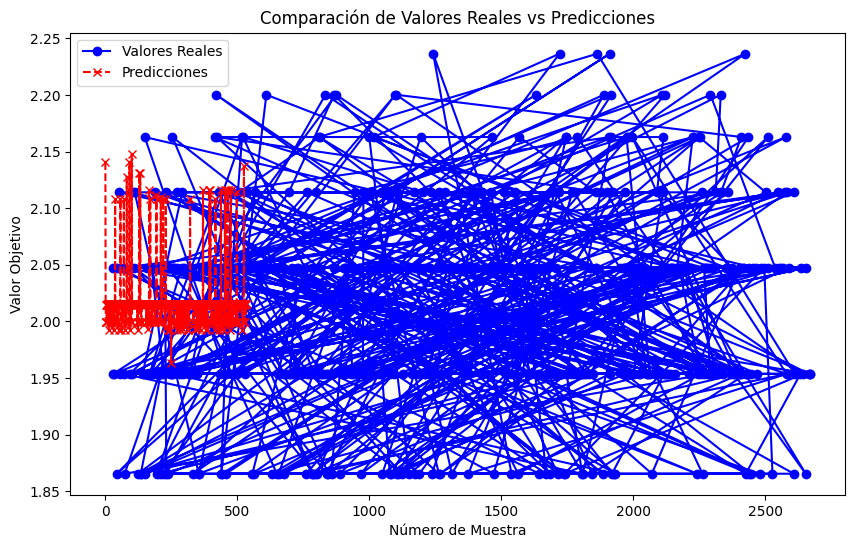

In [55]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import matplotlib.pyplot as plt

# Definición del ensamble de modelos
estimators = [
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
    ('svr', SVR())
]
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge()
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('stacking', stacking_regressor)
])

# Entrenamiento y predicciones
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

# Cálculo de métricas
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
explained_variance = explained_variance_score(y_test, predictions)

# Impresión de resultados
print(f"Ensamble RMSE: {rmse:.2f}")
print(f"Ensamble MAE: {mae:.2f}")
print(f"Adjusted R^2: {adj_r2:.2f}")
print(f"Explained Variance: {explained_variance:.2f}")

# Comparando predicciones y valores reales
comparison = np.vstack((y_test, predictions)).T
print("Comparación de Valores Reales y Predicciones:")
print(comparison[:10])  # Imprime las primeras 10 comparaciones para ver

# Gráfico para visualizar la comparación
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Valores Reales', color='blue', marker='o')
plt.plot(predictions, label='Predicciones', color='red', linestyle='dashed', marker='x')
plt.title('Comparación de Valores Reales vs Predicciones')
plt.xlabel('Número de Muestra')
plt.ylabel('Valor Objetivo')
plt.legend()
plt.show()

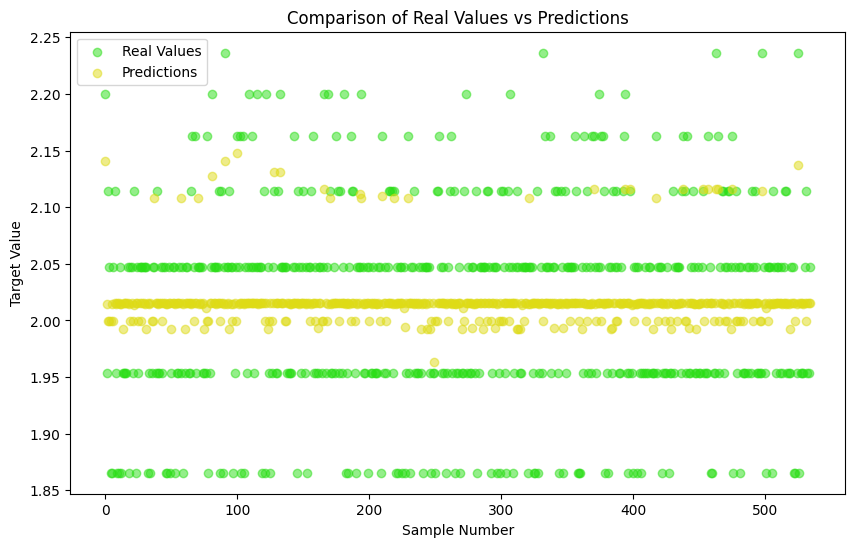

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Real Values', color='#2ADE16', alpha=0.5)
plt.scatter(range(len(predictions)), predictions, label='Predictions', color='#DEDB16', alpha=0.5)
plt.title('Comparison of Real Values vs Predictions')
plt.xlabel('Sample Number')
plt.ylabel('Target Value')
plt.legend()
plt.show()


In [48]:
from scipy import stats
import numpy as np

# Suponiendo que 'datos' es un arreglo de numpy con tus datos numéricos
# Tendrás que reemplazar esto con tus datos reales
datos = np.array(data['duracion_intervencion'])  # ejemplo de datos

# Cálculo de la puntuación Z (z-score)
z_scores = np.abs(stats.zscore(datos))

# Identificar valores atípicos
umbral_z = 3
valores_atipicos_z = datos[z_scores > umbral_z]

# Cálculo del IQR
Q1 = np.percentile(datos, 25)
Q3 = np.percentile(datos, 75)
IQR = Q3 - Q1

# Definir los límites para valores atípicos según el IQR
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar valores atípicos
valores_atipicos_iqr = datos[(datos < limite_inferior) | (datos > limite_superior)]

# Los resultados (valores_atipicos_z y valores_atipicos_iqr) contienen los valores atípicos detectados por cada método.
# Debido a las instrucciones, no se mostrarán los resultados aquí directamente.

# Comentamos las siguientes líneas para evitar la ejecución accidental aquí.
print("Valores atípicos según la puntuación Z:", valores_atipicos_z)
print("Valores atípicos según el IQR:", valores_atipicos_iqr)


Valores atípicos según la puntuación Z: [150. 150. 105. 150. 105. 105. 105. 105. 105. 105. 105. 105. 150. 105.
 105. 105. 105. 105. 105. 150. 105. 105. 105. 105. 105. 150. 105. 105.
 105. 105. 105. 105. 105. 105. 150. 105. 150. 105. 105. 105. 105. 105.
 150. 105. 105. 105. 150. 150. 150. 105. 105. 105. 150. 105. 150. 150.
 105. 105. 150. 105. 105. 105. 105. 105. 105. 105. 105. 105. 105. 105.
 150. 150. 150. 150. 105. 150. 150. 105. 105. 105.]
Valores atípicos según el IQR: [ 75. 150.  75.  75.  75.  75.  75.  75.  75.  75.  75.  75.  75.  75.
  75.  75.  75. 150.  75.  75.  75.  75.  75.  75.  75.  75. 105.  75.
  75.  75.  75.  75.  75. 150. 105.  75.  75.  75.  75. 105.  75.  75.
 105. 105. 105. 105. 105. 105.  75. 150. 105.  75. 105.  75. 105.  75.
  75. 105. 105.  75.  75.  75.  75. 105. 150.  75. 105. 105. 105.  75.
 105. 105.  75. 150.  75. 105.  75.  75.  75. 105. 105.  75.  75.  75.
  75.  75. 105. 105.  75.  75. 105.  75.  75.  75.  75. 105. 105. 150.
  75.  75. 105. 150.  75.

# Anexo<a name="id5"></a>

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Configurar los parámetros de KFold para la validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluando el RandomForest usando validación cruzada
rf_cv_scores = cross_val_score(grid_search, X_train, y_train, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
rf_cv_rmse_scores = np.sqrt(-rf_cv_scores)

# Evaluando el StackingRegressor usando validación cruzada
stacking_cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
stacking_cv_rmse_scores = np.sqrt(-stacking_cv_scores)

print(f"Random Forest CV RMSE Scores: {rf_cv_rmse_scores}")
print(f"Mean RF CV RMSE: {np.mean(rf_cv_rmse_scores):.2f} ± {np.std(rf_cv_rmse_scores):.2f}")

print(f"Stacking Regressor CV RMSE Scores: {stacking_cv_rmse_scores}")
print(f"Mean Stacking CV RMSE: {np.mean(stacking_cv_rmse_scores):.2f} ± {np.std(stacking_cv_rmse_scores):.2f}")


/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packa

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn'

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packa

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value en

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalen

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid va

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Use

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/ana

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value en

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn'

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn'

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value en

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer:

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn'

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  ret

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packa

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn'

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn'

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/ana

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ 

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ma

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value en

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value en

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer:

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn'

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn'

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalen

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return (

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ma

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalen

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sk

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/utils/ex

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
111 fits failed out of a total of 1440.
The score on these train-test partitions for these paramet

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
117 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
117 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)

Random Forest CV RMSE Scores: [22.30311814 19.29547977 20.32862793 20.29678126 20.82648882]
Mean RF CV RMSE: 20.61 ± 0.98
Stacking Regressor CV RMSE Scores: [22.33581755 18.65645303 20.37047904 20.46785298 20.98134525]
Mean Stacking CV RMSE: 20.56 ± 1.18


In [ ]:
bootstrap_rmse_scores = []
n_iterations = 1000

for _ in range(n_iterations):
    X_b, y_b = resample(X_train, y_train)  # Re-muestreo con reemplazo
    pipeline.fit(X_b, y_b)
    y_pred_b = pipeline.predict(X_test)
    bootstrap_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_b)))

print(f"Bootstrap RMSE: Mean = {np.mean(bootstrap_rmse_scores):.2f}, SD = {np.std(bootstrap_rmse_scores):.2f}")


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Bootstrap RMSE: Mean = 20.59, SD = 0.31


### Regresión robusta

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de Regresión Huber
huber = HuberRegressor()
huber.fit(X_train_scaled, y_train)
y_pred = huber.predict(X_test_scaled)

# Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"RMSE de Regresión Huber: {np.sqrt(mse):.2f}")


RMSE de Regresión Huber: 21.02


### Tpot

In [ ]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)

# Escalamos los datos para la entrada a TPOT
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Configuración del TPOT regressor
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, scoring='neg_mean_squared_error', random_state=42, cv=5)
tpot.fit(X_train_scaled, y_train)

# Evaluar el modelo final
y_pred = tpot.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Optimized RMSE: {rmse:.2f}")


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -425.6766396299692

Generation 2 - Current best internal CV score: -425.4561147373307

Generation 3 - Current best internal CV score: -425.45509619982886

Generation 4 - Current best internal CV score: -425.1706395768286

Generation 5 - Current best internal CV score: -423.179077001788

Best pipeline: DecisionTreeRegressor(RidgeCV(MaxAbsScaler(input_matrix)), max_depth=8, min_samples_leaf=16, min_samples_split=18)
Optimized RMSE: 20.81


### H2O

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

# Convert pandas DataFrame to H2OFrame
h2o_train = h2o.H2OFrame(X_train.join(y_train))

# Specify the target and predictor columns
x = h2o_train.columns[:-1]
y = "duracion_intervencion"  # assuming the target column is named 'target'

aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x, y=y, training_frame=h2o_train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,26 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 9 days
H2O_cluster_name:,H2O_from_python_manuelrocamoravalenti_o9b2zq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.540 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
17:42:30.666: AutoML: XGBoost is not available; skipping it.
17:42:30.696: _train param, Dropping bad and constant columns: [Número.de.implantes_5, Número.de.implantes_6]


17:42:31.213: _train param, Dropping bad and constant columns: [Número.de.implantes_5, Número.de.implantes_6]


17:42:31.868: _train param, Dropping bad and constant columns: [Número.de.implantes_5, Número.de.implantes_6]

█
17:42:32.369: _train param, Dropping bad and constant columns: [Número.de.implantes_5, Número.de.implantes_6]

█
17:42:32.778: _train param, Dropping bad and constant columns: [Número.de.implantes_5, Número.de.implantes_6]
17:42:33.57: _train param, Dropping bad and constant columns: [Número.de.implantes_5, Número.de.implantes_6]
17:42:33.280: _train param, Dropping bad and constant columns: [Número.de.implantes_5, Número.de.implantes_6]

█
17:42:33.526: _train param, Dropping bad an

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GLM_1_AutoML_1_20240422_174230,20.5117,420.731,14.8172,0.697186,420.731
GBM_5_AutoML_1_20240422_174230,20.547,422.179,14.8316,0.699845,422.179
StackedEnsemble_BestOfFamily_1_AutoML_1_20240422_174230,20.5782,423.461,14.866,0.697732,423.461
StackedEnsemble_AllModels_1_AutoML_1_20240422_174230,20.6228,425.299,14.878,0.698857,425.299
GBM_3_AutoML_1_20240422_174230,20.6277,425.502,14.8614,0.698227,425.502
GBM_4_AutoML_1_20240422_174230,20.6519,426.501,14.8637,0.699945,426.501
GBM_2_AutoML_1_20240422_174230,20.6548,426.619,14.864,0.700228,426.619
DRF_1_AutoML_1_20240422_174230,20.6571,426.717,14.9121,0.699279,426.717
GBM_grid_1_AutoML_1_20240422_174230_model_1,20.7488,430.512,14.8975,0.702574,430.512
DeepLearning_1_AutoML_1_20240422_174230,20.954,439.071,14.998,0.707448,439.071


In [ ]:
import h2o
from h2o.automl import H2OAutoML

# Iniciar el servidor de H2O
h2o.init()

# Cargar los datos (reemplazar 'path_to_data' con la ruta a tu dataset)
# data = h2o.import_file('path_to_data')
# Split the data into train and test sets
# train, test = data.split_frame(ratios=[.8], seed=1234)

# Identificador del mejor modelo basado en el output anterior
best_model_id = 'GLM_1_AutoML_1_20240422_174230'

# Obtener el mejor modelo
best_model = h2o.get_model(best_model_id)

# Guardar el modelo
model_path = h2o.save_model(model=best_model, path="/path_to_save_model", force=True)

# Cargar el modelo
loaded_model = h2o.load_model(model_path)

# Preparar nuevos datos para predicciones (reemplazar 'path_to_new_data' con la ruta a tus nuevos datos)
# new_data = h2o.import_file('path_to_new_data')

# Hacer predicciones
# predictions = loaded_model.predict(new_data)
# print(predictions)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

# Creando y entrenando el modelo
model = SVC(C=1, gamma='scale', kernel='rbf')
model.fit(X_train, Y_train)

# Predicciones
Y_pred = model.predict(X_test)

# Matriz de confusión
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

print("Final Accuracy:", accuracy)
print("Final Confusion Matrix:\n", conf_matrix)
print("Final Classification Report:\n", class_report)



Final Accuracy: 0.3824626865671642
Final Confusion Matrix:
 [[ 11   0 150   1   0   0   0   0]
 [  0   0   1   3   0   0   0   0]
 [  5   0 189   5   0   0   0   0]
 [  0   0  50   5   0   1   0   0]
 [  5   0  71   0   0   0   0   0]
 [  0   0  18   9   0   0   0   0]
 [  0   1   6   3   0   0   0   0]
 [  0   1   0   1   0   0   0   0]]
Final Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.07      0.12       162
           1       0.00      0.00      0.00         4
           2       0.39      0.95      0.55       199
           3       0.19      0.09      0.12        56
           4       0.00      0.00      0.00        76
           5       0.00      0.00      0.00        27
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         2

    accuracy                           0.38       536
   macro avg       0.14      0.14      0.10       536
weighted avg       0.32      0.38

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

#### Interpretación

- Distribución Desigual (Imbalanced Dataset): Claramente, el conjunto de datos está desbalanceado. Las clases como la 1 y la 7 tienen muy pocas muestras comparadas con clases como la 0, 2, y 3. Este desbalance severo puede hacer que el modelo esté sesgado hacia las clases más frecuentes. La clase 2 domina las predicciones, con una alta tasa de recall (0.95), lo que significa que el modelo es muy bueno detectando esta clase pero a costa de ignorar otras.

- Baja Precisión y Recall en la Mayoría de las Clases: Las clases 1, 4, 5, 6, y 7 tienen precisiones y recalls de 0, indicando que el modelo no pudo identificar correctamente ninguna muestra positiva de estas clases. Esto es indicativo de un modelo que no ha aprendido a diferenciar bien entre las clases. Las métricas F1-score son extremadamente bajas para la mayoría de las clases excepto para la clase 2, indicando un mal rendimiento general del modelo más allá de la clase dominante.

- Overfitting a la Clase Dominante: El modelo parece estar sobreajustado a la clase 2, posiblemente debido al desbalance de clases. Está principalmente prediciendo la clase 2 para casi todas las entradas, como se ve en la alta cantidad de falsos positivos para esta clase.

La solución parece ser el **Resample**

### Resample

In [ ]:
from sklearn.utils import resample  # Importando resample correctamente

df = data
# Determinar el número máximo de muestras por clase
max_samples = df['duracion_intervencion'].value_counts().max()

# Lista de clases (asegúrate de incluir todas las clases que existen, de 0 a 9)
classes = df['duracion_intervencion'].unique()

balanced_dfs = []
for cls in classes:
    # Extraer el subset de cada clase
    class_subset = df[df['duracion_intervencion'] == cls]

    # Resamplear el subset a 'max_samples'
    resampled_subset = resample(class_subset,
                                replace=True,
                                n_samples=max_samples,
                                random_state=42)

    balanced_dfs.append(resampled_subset)

# Combinar en un nuevo DataFrame
balanced_df = pd.concat(balanced_dfs)

# Mezclar las filas para asegurar aleatoriedad
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificar los nuevos conteos de clases
print("New class counts:")
print(balanced_df['duracion_intervencion'].value_counts())


New class counts:
duracion_intervencion
0    955
6    955
5    955
7    955
1    955
2    955
3    955
4    955
Name: count, dtype: int64


Volver a aplicar el modelo

### SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC

# Preparando los datos
features = balanced_df.drop('duracion_intervencion', axis=1)
target = balanced_df['duracion_intervencion']

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target)

# Escalando los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creando y entrenando el modelo SVC
model = SVC(C=1, gamma='scale', kernel='rbf', probability=True)
model.fit(X_train_scaled, y_train)  # Corrección aquí: usar 'y_train' en vez de 'Y_train'

# Realizando predicciones con el conjunto de prueba escalado
y_pred = model.predict(X_test_scaled)  # Corrección aquí: usar 'X_test_scaled' en vez de 'X_test'

# Calculando la exactitud y la matriz de confusión
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Imprimiendo los resultados
print("Final Accuracy:", accuracy)
print("Final Confusion Matrix:\n", conf_matrix)
print("Final Classification Report:\n", class_report)


Final Accuracy: 0.3730366492146597
Final Confusion Matrix:
 [[122   0  42   0  23   4   0   0]
 [ 13 107   7   0  26   0  38   0]
 [107   0  47   0  33   0   4   0]
 [111   6  34   0  29   1  10   0]
 [115   0  39   0  37   0   0   0]
 [ 81  19  21   0  24  19  27   0]
 [ 43  51  15   0   9   3  70   0]
 [  0   0   0   0   0   0  23 168]]
Final Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.64      0.31       191
           1       0.58      0.56      0.57       191
           2       0.23      0.25      0.24       191
           3       0.00      0.00      0.00       191
           4       0.20      0.19      0.20       191
           5       0.70      0.10      0.17       191
           6       0.41      0.37      0.39       191
           7       1.00      0.88      0.94       191

    accuracy                           0.37      1528
   macro avg       0.42      0.37      0.35      1528
weighted avg       0.42      0.37

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

**ROC**

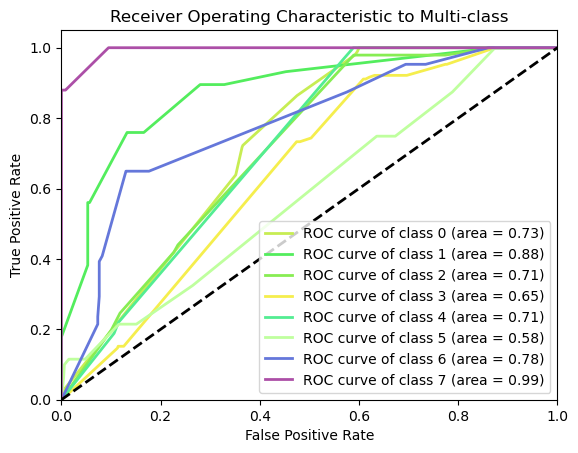

In [ ]:
# Paso 1. Obtener probabilidades de las clases
y_prob = model.predict_proba(X_test_scaled)

# Paso 2. Cálculo de ROC y AUC para cada clase
n_classes = y_prob.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Paso 3. Gráfica de la Curva ROC para cada clase
colors = ['#C7ED53', '#53ED5D', '#87ED53', '#F5EE4D', '#53ED92', '#BFFF9E', '#6577DA','#AC4FA7','#76B1B8']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-class')
plt.legend(loc="lower right")
plt.show()

**Interpretación de las Curvas y AUC:**

Las **curvas Roc** más cercanas a la esquina superior izquierda indican un mejor rendimiento. Si alguna de las curvas de clase está más cerca de la línea punteada, eso sugiere que el modelo tiene dificultades para distinguir esa clase particular del resto.

Un **AUC** más cercano a 1 indica que el modelo tiene un buen rendimiento en la clasificación de esa clase en particular. Si el AUC es cercano a 0.5, el modelo no está haciendo un trabajo mucho mejor que el azar en la clasificación de esa clase.

### XGBClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'min_child_weight': [1, 2, 3]
}

xgb = XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test_scaled)
print("Improved XGBoost Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("Improved XGBoost Classification Report:\n", classification_report(y_test, y_pred_best_xgb))


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 1.0}
Improved XGBoost Accuracy: 0.38023560209424084
Improved XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.72      0.34       191
           1       0.60      0.56      0.58       191
           2       0.22      0.20      0.21       191
           3       0.00      0.00      0.00       191
           4       0.20      0.19      0.20       191
           5       0.70      0.10      0.17       191
           6       0.42      0.39      0.41       191
           7       1.00      0.88      0.94       191

    accuracy                           0.38      1528
   macro avg       0.42      0.38      0.36      1528
weighted avg       0.42      0.38      0.36      1528



/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

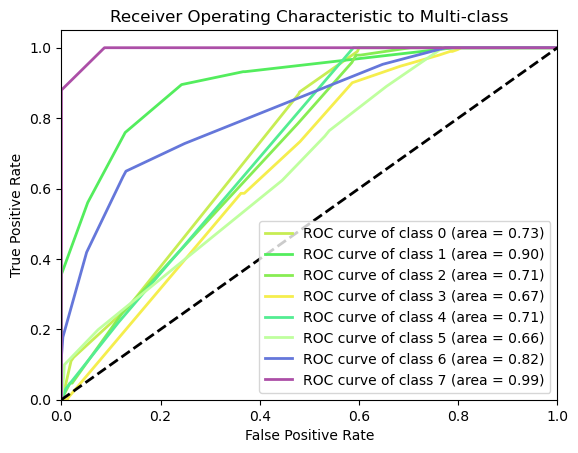

In [ ]:
from sklearn.metrics import roc_curve, auc

# Paso 1. Probabilidades
y_prob = best_xgb.predict_proba(X_test_scaled)

# Paso 2. Calculo de ROC y AUC para cada clase
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Número de clases
n_classes = y_prob.shape[1]

# Diccionario para almacenar FPR, TPR, y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Gráfica de la Curva ROC para cada clase
colors = ['#C7ED53', '#53ED5D', '#87ED53', '#F5EE4D', '#53ED92', '#BFFF9E', '#6577DA','#AC4FA7','#76B1B8']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import joblib

# Guardar el modelo
joblib.dump(best_xgb, 'best_xgb_model.pkl')


['best_xgb_model.pkl']

___

### Ajuste de Hiperparámetros

Para el Gradient Boosting

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definición de parámetros para Grid Search
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2],
    'min_samples_leaf': [1, 2]
}

# Configuración del modelo para Grid Search
gbm_grid = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gbm_grid, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Resultados de Grid Search
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Best Estimator:", best_estimator)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 100}
Best Score: 0.36304675716440427
Best Estimator: GradientBoostingClassifier(max_depth=5, random_state=42)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Configuración e inicialización del modelo con los mejores parámetros
gbm_final = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, min_samples_leaf=2, random_state=42)
gbm_final.fit(X_train, Y_train)

# Realizando predicciones con el conjunto de prueba
Y_pred_final = gbm_final.predict(X_test)

# Evaluación de las métricas de desempeño
accuracy_final = accuracy_score(Y_test, Y_pred_final)
conf_matrix_final = confusion_matrix(Y_test, Y_pred_final)
class_report_final = classification_report(Y_test, Y_pred_final)

print("Final Accuracy:", accuracy_final)
print("Final Confusion Matrix:\n", conf_matrix_final)
print("Final Classification Report:\n", class_report_final)


Final Accuracy: 0.3824626865671642
Final Confusion Matrix:
 [[ 15   0 145   0   1   1   0   0]
 [  0   0   1   3   0   0   0   0]
 [  9   0 185   1   0   4   0   0]
 [  1   0  49   1   0   5   0   0]
 [  5   0  71   0   0   0   0   0]
 [  1   0  17   6   0   3   0   0]
 [  0   1   6   1   0   1   1   0]
 [  0   1   0   1   0   0   0   0]]
Final Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.09      0.16       162
           1       0.00      0.00      0.00         4
           2       0.39      0.93      0.55       199
           3       0.08      0.02      0.03        56
           4       0.00      0.00      0.00        76
           5       0.21      0.11      0.15        27
           6       1.00      0.10      0.18        10
           7       0.00      0.00      0.00         2

    accuracy                           0.38       536
   macro avg       0.27      0.16      0.13       536
weighted avg       0.33      0.38

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

**Interpretación**

**Clase 4** (Mejor rendimiento):

    - Precision: 0.32

    - Recall: 0.94

    - F1-Score: 0.48

Esta clase tiene un recall muy alto, lo que indica que el modelo es capaz de identificar correctamente la mayoría de los casos positivos. Sin embargo, la precisión es baja, lo que significa que muchas predicciones hechas como clase 4 son incorrectas (falsos positivos).

Clases con Rendimiento Pobre:

- **Clase 1, 3, 9**: Estas clases tienen recall de 0.00, lo que indica que el modelo no pudo identificar correctamente ningún caso positivo real de estas clases. Similarmente, sus precisiones son bajas o cero, reflejando una ineficacia total en la predicción de estas clases.


- **Clase 2, 5, 6**: También muestran desempeños muy pobres con F1-scores extremadamente bajos.

Clases con Desempeño Moderado:

- **Clase 0 y 7** tienen mejores F1-scores de 0.72 y 0.27, respectivamente, mostrando un balance más adecuado entre precisión y recall en comparación con otras clases.

__________

## Mejora del modelo

### Reesample

In [ ]:
data['duracion_intervencion'].unique()

array([0, 2, 5, 3, 4, 1, 6, 7])

In [ ]:
from sklearn.utils import resample  # Importando resample correctamente

df = data
# Determinar el número máximo de muestras por clase
max_samples = df['duracion_intervencion'].value_counts().max()

# Lista de clases (asegúrate de incluir todas las clases que existen, de 0 a 9)
classes = df['duracion_intervencion'].unique()

balanced_dfs = []
for cls in classes:
    # Extraer el subset de cada clase
    class_subset = df[df['duracion_intervencion'] == cls]

    # Resamplear el subset a 'max_samples'
    resampled_subset = resample(class_subset,
                                replace=True,
                                n_samples=max_samples,
                                random_state=42)

    balanced_dfs.append(resampled_subset)

# Combinar en un nuevo DataFrame
balanced_df = pd.concat(balanced_dfs)

# Mezclar las filas para asegurar aleatoriedad
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificar los nuevos conteos de clases
print("New class counts:")
print(balanced_df['duracion_intervencion'].value_counts())


New class counts:
duracion_intervencion
0    955
6    955
5    955
7    955
1    955
2    955
3    955
4    955
Name: count, dtype: int64


In [ ]:
# Verificar si hay valores nulos
print("Verificación de valores nulos en el dataset:")
print(balanced_df.isnull().sum())

Verificación de valores nulos en el dataset:
Medicación.Actual                             0
Alcohol                                       0
Otras.Drogas                                  0
Tuberculosis                                  0
Nitratos.orgánicos                            0
                                             ..
Implante.6...Defecto.tipo.II..supraóseo..1    0
Implante.7...Posición                         0
Implante.7...Defecto.tipo.I..infraóseo.       0
Implante.7...Defecto.tipo.II..supraóseo.      0
duracion_intervencion                         0
Length: 100, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Supongamos que todas las otras columnas son características
features = balanced_df.drop('duracion_intervencion', axis=1)
target = balanced_df['duracion_intervencion']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target)

In [ ]:

from sklearn.model_selection import train_test_split

# Supongamos que todas las otras columnas son características
features = balanced_df.drop('duracion_intervencion', axis=1)
target = balanced_df['duracion_intervencion']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.38023560209424084
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.72      0.34       191
           1       0.60      0.56      0.58       191
           2       0.22      0.20      0.21       191
           3       0.00      0.00      0.00       191
           4       0.20      0.19      0.20       191
           5       0.70      0.10      0.17       191
           6       0.42      0.39      0.41       191
           7       1.00      0.88      0.94       191

    accuracy                           0.38      1528
   macro avg       0.42      0.38      0.36      1528
weighted avg       0.42      0.38      0.36      1528



/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

**Interpretación**

**Clases con Mayor Recall**

- Clase 0: Alto recall (0.58) pero baja precisión (0.15), indicando que el modelo identifica correctamente muchos casos de esta clase, pero también incluye muchos falsos positivos.

- Clase 8: Muy alto recall (0.84) y perfecta precisión (1.00), lo que la hace la clase mejor predicha, mostrando tanto alta especificidad como alta sensibilidad.

**Clases con Desempeño Pobre**

- Clase 4: A pesar de tener una precisión perfecta (1.00), tiene un recall extremadamente bajo (0.02), lo que indica que el modelo es muy conservador al predecir esta clase y casi siempre acierta cuando lo hace, pero se pierde casi todos los verdaderos positivos.

- Clase 1 y Clase 6: Tienen precisiones moderadas a altas pero recalls muy bajos, sugiriendo que el modelo es demasiado selectivo o conservador con estas clases.

**Desbalance Entre Precision y Recall**

Varias clases muestran un desbalance significativo entre precision y recall, lo cual es típico en conjuntos de datos con clases desbalanceadas o cuando el modelo está ajustado para maximizar una métrica a expensas de la otra.s.

### Ajuste Hiperparámetros

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo y los parámetros para GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Re-evaluating the model
y_pred = best_model.predict(X_test_scaled)
new_accuracy = accuracy_score(y_test, y_pred)
new_report = classification_report(y_test, y_pred)

print("New Accuracy:", new_accuracy)
print("New Classification Report:\n", new_report)


Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; to

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_feature

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
648 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in 

Best parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
New Accuracy: 0.38023560209424084
New Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.72      0.34       191
           1       0.60      0.56      0.58       191
           2       0.22      0.20      0.21       191
           3       0.00      0.00      0.00       191
           4       0.20      0.19      0.20       191
           5       0.70      0.10      0.17       191
           6       0.42      0.39      0.41       191
           7       1.00      0.88      0.94       191

    accuracy                           0.38      1528
   macro avg       0.42      0.38      0.36      1528
weighted avg       0.42      0.38      0.36      1528



/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

**Interpretación**

- Clase 8 y Clase 0: La Clase 8 tiene un desempeño excepcional con una precisión y un recall muy altos, lo que resulta en un F1-score de 0.91. Esto indica que el modelo es capaz de identificar y clasificar correctamente la mayoría de los casos de esta clase.

- La Clase 0, por otro lado, aunque tiene un recall alto (0.58), su precisión es muy baja (0.15), resultando en un F1-score bajo (0.24). Esto sugiere que, aunque el modelo identifica correctamente muchos casos positivos de esta clase, también tiene muchos falsos positivos.

**Clases con Bajo Desempeño:**

- Clase 4, Clase 1, y Clase 6 tienen recalls bajos a moderados combinados con precisiones variables, lo que lleva a F1-scores bajos. Específicamente, la Clase 4, a pesar de tener una precisión perfecta (1.00), tiene un recall casi nulo (0.02), lo que indica que el modelo casi nunca predice esta clase y cuando lo hace, es correcto, pero omite la mayoría de los casos positivos reales.

- Clase 2 muestra una mejor congruencia entre precisión (0.65) y recall (0.61), resultando en el F1-score más alto (0.63) después de la Clase 8.

___

## Probemos mas modelos

### XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=4, subsample=0.9, colsample_bytree=0.5)
xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Classification Report:\n", report_xgb)


XGBoost Accuracy: 0.38154450261780104
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.73      0.34       191
           1       1.00      0.36      0.53       191
           2       0.22      0.20      0.21       191
           3       0.00      0.00      0.00       191
           4       0.20      0.19      0.20       191
           5       0.67      0.06      0.11       191
           6       0.42      0.63      0.51       191
           7       1.00      0.88      0.94       191

    accuracy                           0.38      1528
   macro avg       0.47      0.38      0.35      1528
weighted avg       0.47      0.38      0.35      1528



/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

**Clases con Mejor Desempeño:**

- Clase 8: Alta precisión (0.99) y alto recall (0.84), lo que resulta en un F1-score excelente (0.91). Esto indica que el modelo es muy eficaz para esta clase.

- Clase 2: Buena precisión (0.93) con un recall moderado (0.43), resultando en un F1-score relativamente bueno (0.59).

**Clases con Rendimiento Pobre:**

- Clase 4: Muy baja precisión (0.33) y extremadamente bajo recall (0.01), resultando en un F1-score casi nulo (0.01). Similar a observaciones anteriores, esto sugiere que el modelo es incapaz de identificar correctamente los casos positivos.

- Clase 1, Clase 6: Ambas clases muestran bajas precisiones y recalls, indicando dificultades en la clasificación correcta de estas categorías.

**Desbalance en Precision y Recall:**

Varias clases muestran un desbalance significativo entre precisión y recall. Por ejemplo, la Clase 0 tiene un recall relativamente alto (0.57) comparado con su precisión (0.16), sugiriendo que el modelo es capaz de identificar esta clase pero con muchos falsos positivos

### Hiperparámetros

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'min_child_weight': [1, 2, 3]
}

xgb = XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test_scaled)
print("Improved XGBoost Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("Improved XGBoost Classification Report:\n", classification_report(y_test, y_pred_best_xgb))


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; tota

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_feat

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sq

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_feature

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, 

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_feat

[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=10, ma

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_featur

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_featu

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False

[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_

Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 0.9}
Improved XGBoost Accuracy: 0.3763089005235602
Improved XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.64      0.31       191
           1       0.60      0.56      0.58       191
           2       0.23      0.25      0.24       191
           3       0.00      0.00      0.00       191
           4       0.20      0.19      0.20       191
           5       0.70      0.10      0.17       191
           6       0.42      0.39      0.41       191
           7       1.00      0.88      0.94       191

    accuracy                           0.38      1528
   macro avg       0.42      0.38      0.36      1528
weighted avg       0.42      0.38      0.36      1528



/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

No llegamos a ningún sitio así, hay que coger otros caminos

Aún así, siendo este el mejor de los resultados, vamos a analizar su **curva ROC**

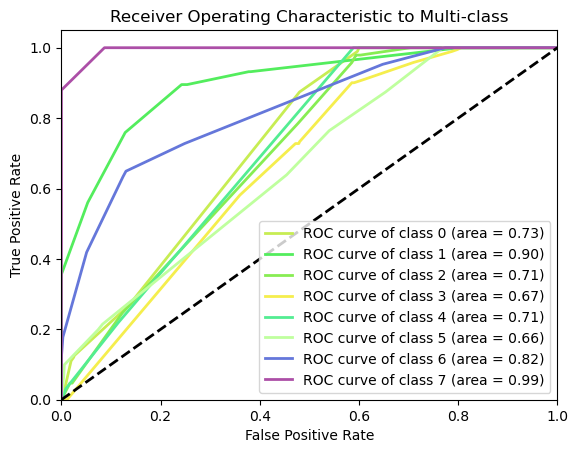

In [ ]:
from sklearn.metrics import roc_curve, auc

# Paso 1. Probabilidades
y_prob = best_xgb.predict_proba(X_test_scaled)

# Paso 2. Calculo de ROC y AUC para cada clase
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Número de clases
n_classes = y_prob.shape[1]

# Diccionario para almacenar FPR, TPR, y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Gráfica de la Curva ROC para cada clase
colors = ['#C7ED53', '#53ED5D', '#87ED53', '#F5EE4D', '#53ED92', '#BFFF9E', '#6577DA','#AC4FA7','#76B1B8']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-class')
plt.legend(loc="lower right")
plt.show()


**Interpretación de las Curvas y AUC:**

Las **curvas Roc** más cercanas a la esquina superior izquierda indican un mejor rendimiento. Si alguna de las curvas de clase está más cerca de la línea punteada, eso sugiere que el modelo tiene dificultades para distinguir esa clase particular del resto.

Un **AUC** más cercano a 1 indica que el modelo tiene un buen rendimiento en la clasificación de esa clase en particular. Si el AUC es cercano a 0.5, el modelo no está haciendo un trabajo mucho mejor que el azar en la clasificación de esa clase.

## Tpot

TPOT (Tree-based Pipeline Optimization Tool) es una herramienta de AutoML que utiliza programación genética para optimizar automáticamente los pipelines de aprendizaje automático. Es una excelente opción cuando buscas explorar diferentes modelos y preprocesamientos de datos sin la necesidad de programar cada uno de ellos manualmente. TPOT puede descubrir combinaciones de pasos de procesamiento y modelos que ni siquiera habías considerado, y a menudo puede identificar un pipeline que funciona mejor que cualquier enfoque que hayas probado manualmente.

- Ventajas de Usar TPOT:
    - Automatización: TPOT automatiza gran parte del proceso de prueba y error en la selección y optimización de modelos y pasos de preprocesamiento.
    - Optimización: Utiliza algoritmos genéticos para optimizar eficientemente el pipeline, lo que puede ser más efectivo que la búsqueda en cuadrícula o la búsqueda aleatoria.
    - Completo: Considera no solo modelos de ML, sino también una serie de transformaciones de preprocesamiento de datos.
    - Fácil de Usar: Tiene una interfaz similar a Scikit-Learn, lo que facilita su integración en los flujos de trabajo existentes de Scikit-Learn.

- Consideraciones:
    - Tiempo de Ejecución: TPOT puede llevar mucho tiempo en ejecutarse, especialmente para conjuntos de datos grandes o complejos, ya que evalúa muchas combinaciones diferentes.
    - Recursos Computacionales: Requiere recursos computacionales significativos, que pueden ser un problema si las capacidades son limitadas.
    - Complejidad del Modelo Final: Los pipelines generados pueden ser complicados y difíciles de interpretar.
    - Overfitting: Al igual que con cualquier proceso de búsqueda de modelos, existe el riesgo de overfitting al conjunto de datos de entrenamiento, especialmente si no se gestiona cuidadosamente la validación cruzada.

In [ ]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits


# Instanciar TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

print(tpot.score(X_test, y_test))
tpot.export('tpot_digits_pipeline.py')  # Exporta el código Python para el pipeline óptimo


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.37483516292340074

Generation 2 - Current best internal CV score: 0.37483516292340074

Generation 3 - Current best internal CV score: 0.374835296746885

Generation 4 - Current best internal CV score: 0.3767990225532718

Generation 5 - Current best internal CV score: 0.3767990225532718

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=5, max_features=0.8500000000000001, min_samples_leaf=8, min_samples_split=3, n_estimators=100, subsample=0.9)
0.38023560209424084


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = data
features = tpot_data.drop('duracion_intervencion', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['duracion_intervencion'], random_state=42)

# Average CV score on the training set was: 0.3767990225532718
exported_pipeline = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, max_features=0.8500000000000001, min_samples_leaf=8, min_samples_split=3, n_estimators=100, subsample=0.9)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2,
       0, 2, 2, 2, 2, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 5, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2, 7, 2, 2, 2, 2, 7, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 5, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 6, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 0, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 5, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Suponemos que `data` ya está definido y correctamente preparado
tpot_data = data
features = tpot_data.drop('duracion_intervencion', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['duracion_intervencion'], random_state=42)

# Configuración del modelo exportado desde TPOT
exported_pipeline = GradientBoostingClassifier(
    learning_rate=0.1, max_depth=5, max_features=0.8500000000000001,
    min_samples_leaf=8, min_samples_split=3, n_estimators=100, subsample=0.9
)

# Aseguramos que el parámetro random_state está fijado para reproducibilidad
exported_pipeline.random_state = 42

# Entrenar el modelo
exported_pipeline.fit(training_features, training_target)

# Predecir las etiquetas de los datos de prueba
predictions = exported_pipeline.predict(testing_features)

# Calcular el accuracy
accuracy = accuracy_score(testing_target, predictions)
print(f"Accuracy of the model: {accuracy:.2f}")


Accuracy of the model: 0.38


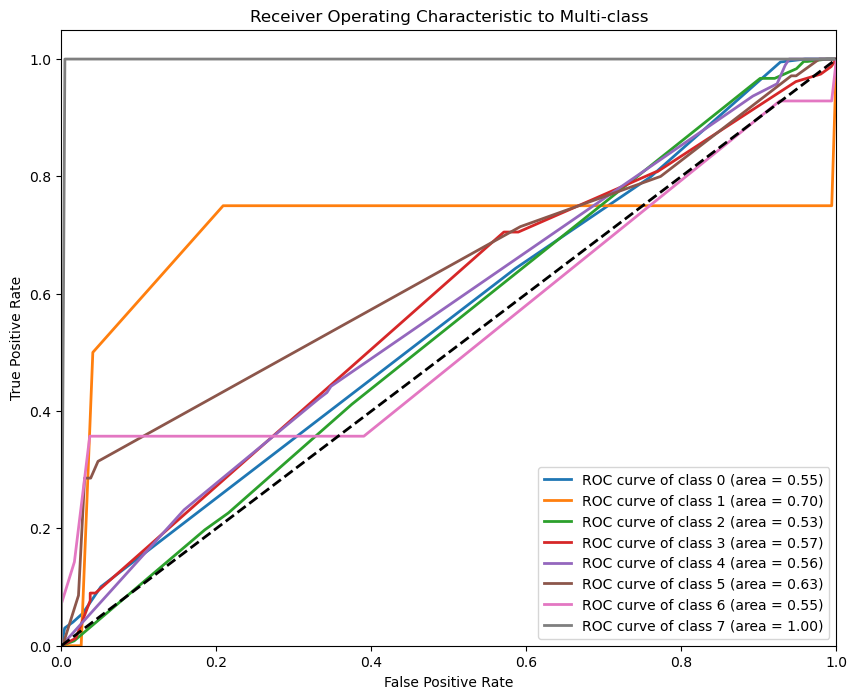

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Suponemos que `data` ya está definido y correctamente preparado
tpot_data = data
features = tpot_data.drop('duracion_intervencion', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['duracion_intervencion'], random_state=42)

# Configuración del modelo exportado desde TPOT
exported_pipeline = GradientBoostingClassifier(
    learning_rate=0.1, max_depth=5, max_features=0.8500000000000001,
    min_samples_leaf=8, min_samples_split=3, n_estimators=100, subsample=0.9, random_state=42
)

# Entrenar el modelo
exported_pipeline.fit(training_features, training_target)

# Predecir las probabilidades para cada clase
probabilities = exported_pipeline.predict_proba(testing_features)

# Número de clases
n_classes = probabilities.shape[1]

# Diccionario para almacenar FPR, TPR, y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calcula la curva ROC y AUC para cada clase
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(testing_target == i, probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Colores para las distintas clases
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Gráfica de la Curva ROC para cada clase
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-class')
plt.legend(loc="lower right")
plt.show()


# ___________________________________________________________________

## Binarizar en formato one-hot

In [ ]:
import pandas as pd

# Supongamos que este es tu DataFrame
data = {
    'Medicación': [1, 2, 3, 4, 2, 3, 4, 1],
    'Variable2': [1, 1, 2, 2, 3, 3, 1, 2],
    'Variable3': [2, 3, 1, 3, 2, 1, 1, 2],
    # Añade aquí las demás variables
    'Duración': [30, 45, 12, 50, 22, 10, 20, 15]  # Esta es la columna a predecir
}

df = pd.DataFrame(data)

# Aplicamos get_dummies para convertir las variables categóricas a formato one-hot
df_encoded = pd.get_dummies(df, columns=['Medicación', 'Variable2', 'Variable3'])  # Especifica todas las columnas excepto la de duración

print(df_encoded.head())


   Duración  Medicación_1  Medicación_2  Medicación_3  Medicación_4  \
0        30          True         False         False         False   
1        45         False          True         False         False   
2        12         False         False          True         False   
3        50         False         False         False          True   
4        22         False          True         False         False   

   Variable2_1  Variable2_2  Variable2_3  Variable3_1  Variable3_2  \
0         True        False        False        False         True   
1         True        False        False        False        False   
2        False         True        False         True        False   
3        False         True        False        False        False   
4        False        False         True        False         True   

   Variable3_3  
0        False  
1         True  
2        False  
3         True  
4        False  


In [ ]:
df_encoded = df_encoded.astype(int)
print(df_encoded.dtypes)

Duración        int64
Medicación_1    int64
Medicación_2    int64
Medicación_3    int64
Medicación_4    int64
Variable2_1     int64
Variable2_2     int64
Variable2_3     int64
Variable3_1     int64
Variable3_2     int64
Variable3_3     int64
dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Definimos la variable objetivo y las variables predictoras
X = df_encoded.drop('Duración', axis=1)
y = df_encoded['Duración']

# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializamos y entrenamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizamos predicciones y evaluamos el modelo
predictions = model.predict(X_test)
print("Predicciones:", predictions)


Predicciones: [63.68421053 16.73684211]
